In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Load the data from the uploaded file
file_path1 = './NEW_F0_averaged_GEstatusCategories.csv'
data_f0 = pd.read_csv(file_path1)

file_path2 = './NEW_GEI_combined_with_stats.csv'
data_gei = pd.read_csv(file_path2)


In [6]:
# Combining 'Medium' and 'Low' into one category 'Medium_Low'
data_f0['GE_status_combined'] = data_f0['GE_status'].replace({'Medium': 'Medium & Low', 'Low': 'Medium & Low'})

high_data = data_f0[data_f0['GE_status'] == 'High']
medium_low_data = data_f0[data_f0['GE_status_combined'] == 'Medium & Low']


print(data_f0.head())

   Unnamed: 0  X  Year        Country      avg_f0       GEI   1st Qu.  \
0           1  1  1965        Finland  218.940000  74.10888  57.45337   
1           2  2  1965    Netherlands  217.160000  67.10874  57.45337   
2           3  3  1965         Sweden  217.724000  70.08254  57.45337   
3           4  4  1965       Thailand  230.265714  63.15021  57.45337   
4           5  5  1965  United States  189.323333  67.24675  57.45337   

    3rd Qu.      Mean GE_status GE_status_combined  
0  66.14779  61.34105      High               High  
1  66.14779  61.34105      High               High  
2  66.14779  61.34105      High               High  
3  66.14779  61.34105    Medium       Medium & Low  
4  66.14779  61.34105      High               High  


In [12]:
# Sorting data for two plots
x_high_year = high_data['Year']
x_med_low_year = medium_low_data['Year']
y_high_f0 = high_data['avg_f0']
y_med_low_f0 = medium_low_data['avg_f0']
y_high_gei = high_data['Mean']
y_med_low_gei = medium_low_data['Mean']

print(x_high_year.head())
print(x_med_low_year.head())
print(y_high_f0.head())
print(y_med_low_f0.head())
print(y_high_gei.head())
print(y_med_low_gei.head())

0    1965
1    1965
2    1965
4    1965
6    1969
Name: Year, dtype: int64
3     1965
5     1969
9     1969
12    1973
13    1973
Name: Year, dtype: int64
0    218.940000
1    217.160000
2    217.724000
4    189.323333
6    230.770000
Name: avg_f0, dtype: float64
3     230.265714
5     283.643333
9     248.880000
12    267.980000
13    248.080000
Name: avg_f0, dtype: float64
0    61.341050
1    61.341050
2    61.341050
4    61.341050
6    61.824236
Name: Mean, dtype: float64
3     61.341050
5     61.824236
9     61.824236
12    62.678690
13    62.678690
Name: Mean, dtype: float64


In [29]:
# calculate the slope of High and Med/Low f0 data
from scipy.stats import linregress
slope_B, intercept_B, _, _, _ = linregress(range(len(y_high_f0)), y_high_f0)
trend_line_B = [slope_B * i + intercept_B for i in range(len(y_high_f0))]
print('Slope of High data:',slope_B, 'Intercept of High data:', intercept_B)

slope_A, intercept_A, _, _, _ = linregress(range(len(y_med_low_f0)), y_med_low_f0)
trend_line_A = [slope_A * i + intercept_A for i in range(len(y_med_low_f0))]
print('Slope of Med/Low data:',slope_A, 'Intercept of Med/Low data:', intercept_A)

Slope of High data: 0.21807094202898786 Intercept of High data: 223.53717722222217
Slope of Med/Low data: 0.42304594820384517 Intercept of Med/Low data: 241.90685890401673


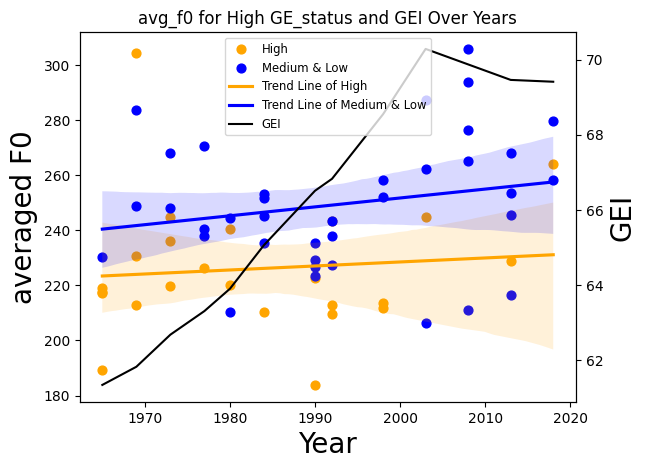

In [22]:
#create a figure and axis object
fig, ax1 = plt.subplots()

#plot the high data with the gei mean data
ax1.scatter(x_high_year, y_high_f0, label='High', color='orange', s=40)
ax1.scatter(x_med_low_year, y_med_low_f0, label='Medium & Low', color='blue', s=40)
sns.regplot(data=high_data, x='Year', y='avg_f0', scatter=False, color='orange', label='Trend Line of High')
sns.regplot(data=medium_low_data, x='Year', y='avg_f0', scatter=False, color='blue', label='Trend Line of Medium & Low')
ax1.set_ylabel('averaged F0', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='y')

#create a second y-axis and plot the second dataset
ax2 = ax1.twinx()
ax2.plot(x_high_year, y_high_gei, label='GEI', color='black')
ax2.set_ylabel('GEI', fontsize=20)
ax2.tick_params(axis='y')

#add a common title and legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', fontsize='small')
plt.title('avg_f0 for High GE_status and GEI Over Years')

plt.show()

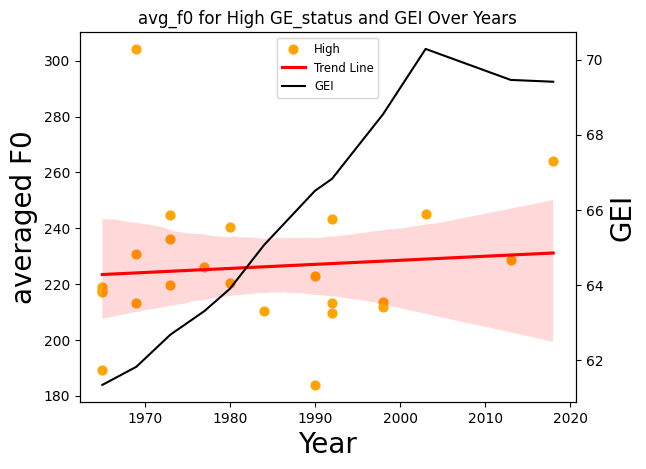

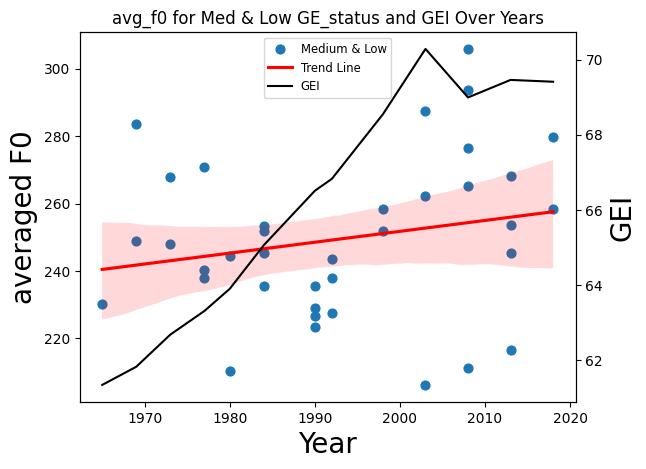

In [38]:
#High data
#create a figure and axis object
fig, ax1 = plt.subplots()

#plot the high data with the gei mean data
ax1.scatter(x_high_year, y_high_f0, label='High', color='orange', s=40)
sns.regplot(data=high_data, x='Year', y='avg_f0', scatter=False, color='red', label='Trend Line')
ax1.set_ylabel('averaged F0', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='y')

#create a second y-axis and plot the second dataset
ax2 = ax1.twinx()
ax2.plot(x_high_year, y_high_gei, label='GEI', color='black')
ax2.set_ylabel('GEI', fontsize=20)
ax2.tick_params(axis='y')

#add a common title and legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', fontsize='small')
plt.title('avg_f0 for High GE_status and GEI Over Years')

plt.show()


#Medium & Low data
#create a figure and axis object
fig, ax1 = plt.subplots()
#plot the high data with the gei mean data
ax1.scatter(x_med_low_year, y_med_low_f0, label='Medium & Low', s=40)
sns.regplot(data=medium_low_data, x='Year', y='avg_f0', scatter=False, color='red', label='Trend Line')
ax1.set_ylabel('averaged F0', fontsize=20)
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='y')

#create a second y-axis and plot the second dataset
ax2 = ax1.twinx()
ax2.plot(x_med_low_year, y_med_low_gei, label='GEI', color='black')
ax2.set_ylabel('GEI', fontsize=20)
ax2.tick_params(axis='y')

#add a common title and legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', fontsize='small')
plt.title('avg_f0 for Med & Low GE_status and GEI Over Years')

plt.show()